# CZ2001 Algorithms Example Class 3
3B: Integration of Mergesort and Insertion Sort

<b>Notebook 1: Modified Mergesort - Values of S</b>

In [16]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

## Import MergeSort & Modified Mergesort codes

Methods in Mergesort:
- <b>run(arr)</b>: Run the mergesort on the given array, and prints the sorted array, the execution time and no. key comparisons made.
- <b>run_time(arr)</b>: Run the mergesort on the given array, and returns the execution time. (Units: )
- <b>run_keycomp(arr)</b>: Run the mergesort on the given array, and returns the no. key comparisons made.

In [2]:
exec(open("mergesort.py").read())

## Import Helper Methods to Create Arrays
4 methods to create arrays:
- <b>populate_array_input()</b>: Gets user input for each element in the array.
- <b>populate_array_random(arr_length)</b>: Creates an array of n random integers.
- <b>populate_array_decreasing(arr_length)</b>: Creates an array of n integers sorted in decreasing order.
- <b>populate_array_worst(arr_length)</b>: Creates an array of n integers which provides the worst case of mergesort.

In [3]:
exec(open("populatearray.py").read())

## Run MergeSort (Testing only)

In [4]:
mSort = MergeSort()
arr = populate_array_input()
print(arr)
mSort.run(arr)

Enter a number, type a non-number to quit: as


KeyboardInterrupt: 

In [ ]:
mSort = ModifiedMergeSort(5)
arr = populate_array_input()
print(arr)
mSort.run(arr)

In [ ]:
mSort = MergeSort()
arr = populate_array_random(23)
print(arr)
mSort.run(arr)

In [ ]:
mmSort = ModifiedMergeSort(5)
arr = populate_array_random(23)
print(arr)
mmSort.run(arr)

In [ ]:
mmSort.set_S(3)
arr =populate_array_random(23)
print(arr)
mmSort.run(arr)

In [ ]:
arr = populate_array_decreasing(23)
print(arr)
mmSort.run(arr)

In [ ]:
mmSort = ModifiedMergeSort(5)
arr = populate_array_random(23)
print(arr)
kc_count = mmSort.run_keycomp(arr)
print("No. Key Comparisons: " + str(kc_count))

# Get runtimes for different values of S and n

In [ ]:
def iterate_sort_random_time(arr_length):
    # generate a random array of size n
    time_taken_list = []
    arr = populate_array_random(arr_length)
    for i in range(0, arr_length+1):
        mms = ModifiedMergeSort(i)
        #get average of 100 runs
        total_runtime = 0
        for j in range(100):
            total_runtime += mms.run_time(arr)
        average_runtime_100 = total_runtime/100
        time_taken_list.append(average_runtime_100)
    return time_taken_list

def iterate_sort_worst_time(arr_length):
    # generate a random array of size n
    time_taken_list = []
    arr = populate_array_worst(arr_length)
    for i in range(0, arr_length+1):
        mms = ModifiedMergeSort(i)
        #get average of 100 runs
        total_runtime = 0
        for j in range(100):
            total_runtime += mms.run_time(arr)
        average_runtime_100 = total_runtime/100
        time_taken_list.append(average_runtime_100)
    return time_taken_list

def iterate_sort_random_keycomp(arr_length):
    mms = ModifiedMergeSort(0)
    keycomp_list = []
    for i in range(0, arr_length+1):
        totalKeycomp = 0
        for j in range(0, 100):
            # generate a random array of size n
            arr = populate_array_random(arr_length)
            mms.set_S(i)
            totalKeycomp += mms.run_keycomp(arr)
            del arr
        averageKeycomp = totalKeycomp/100
        keycomp_list.append(averageKeycomp)
        
    return keycomp_list

def iterate_sort_worst_keycomp(arr_length):
    # generate a random array of size n
    keycomp_list = []
    arr = populate_array_worst(arr_length)
    for i in range(0, arr_length+1):
        mms = ModifiedMergeSort(i)
        keycomp = mms.run_keycomp(arr)
        keycomp_list.append(keycomp)
    return keycomp_list

def iterate_sort_decreasing_keycomp(arr_length):
    # generate a random array of size n
    keycomp_list = []
    arr = populate_array_decreasing(arr_length)
    for i in range(0, arr_length+1):
        mms = ModifiedMergeSort(i)
        keycomp = mms.run_keycomp(arr)
        keycomp_list.append(keycomp)
    return keycomp_list

In [ ]:
n = int(input("Enter the value of n:\n"))
average_runtime = iterate_sort_random_time(n)
worst_runtime = iterate_sort_worst_time(n)


df = pd.DataFrame({"S": range(0, n+1), "average case": average_runtime, "worst case": worst_runtime})
print(df,"\n")

#to find row with the fastest time
print(df.loc[df["average case"] == df["average case"].min()])
print(df.loc[df["worst case"] == df["worst case"].min()])

#plot average case in blue and worst case in red in increasing S for n
plt.plot(df["S"], df["average case"], 'b', df["S"], df["worst case"], 'r')
plt.ylabel('t')
plt.xlabel('n = '+ str(n))
plt.show()


### Based on keycomp instead of time (Not used)
Execution time is a more important factor over key comparisons, as we should would like to increase runtime performance.

In [ ]:
n = int(input("Value of n?\n"))
average_keycomp = iterate_sort_random_keycomp(n)
worst_keycomp = iterate_sort_worst_keycomp(n)
decreasing_keycomp = iterate_sort_decreasing_keycomp(n)
df = pd.DataFrame({"S": range(0, n + 1), "average case": average_keycomp, "worst case": worst_keycomp, "decreasing case": decreasing_keycomp})
print("n = ", n)
print("lowest keycomp for average case")
print(df.loc[df["average case"] == df["average case"].min()])
print("lowest keycomp for worst case")
print(df.loc[df["worst case"] == df["worst case"].min()])
print("lowest keycomp for decreasing case")
print(df.loc[df["decreasing case"] == df["decreasing case"].min()])


   average S  worst S
0         24       20
1          7       15
2         10       23
3          7       16
4         16        7


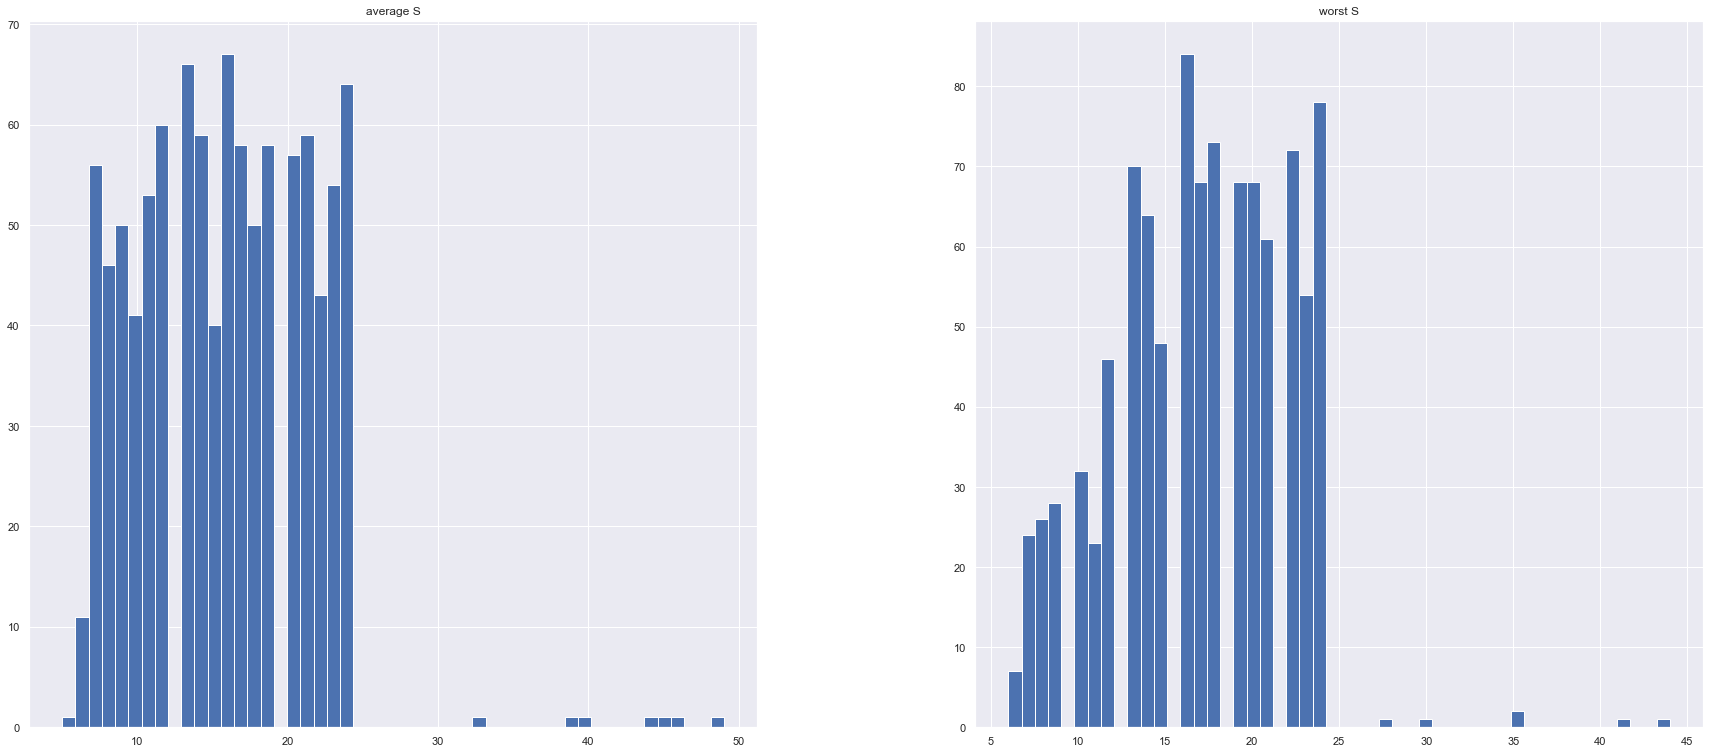

In [26]:
values_S = pd.read_csv("Data/values_S.csv")
print(values_S.head())
hist = values_S.hist(bins=50, figsize = (30,13))

,average S,worst S
0,16,16


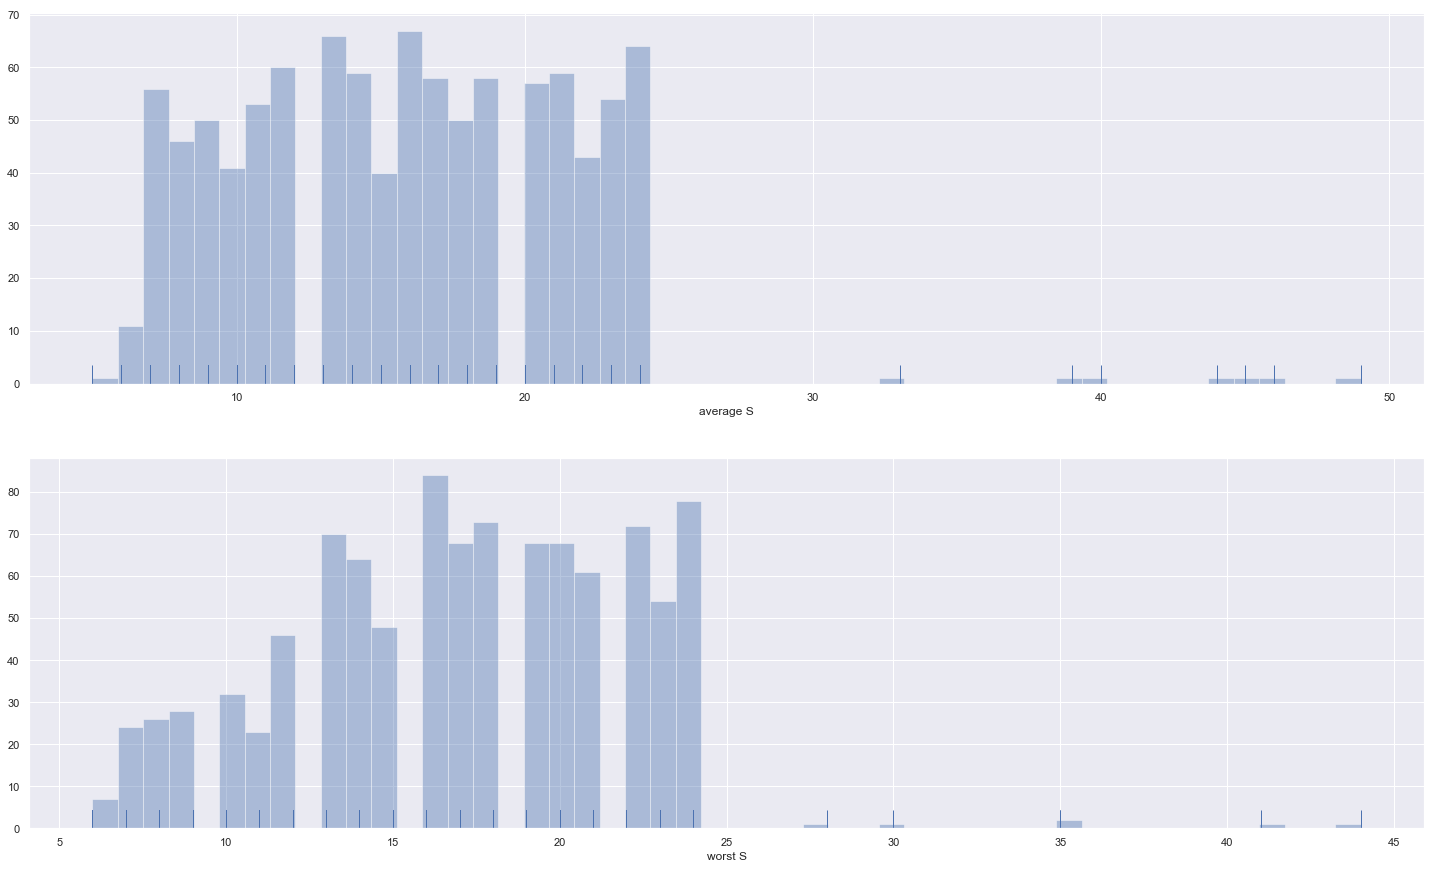

In [49]:
f ,axes = plt.subplots(2,1,figsize = (25, 15))
sns.distplot(values_S["average S"], bins=50, kde=False, rug=True,ax = axes[0])
sns.distplot(values_S["worst S"], bins=50, kde=False, rug=True,ax = axes[1])
values_S.mode()